In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.constraints import max_norm

2024-09-22 08:53:27.573875: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 08:53:27.574010: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 08:53:27.710090: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
dataset=pd.read_csv("dataset.csv")

In [3]:
X=dataset.drop(columns=['Pneumonia Detected','subject_id'])
y=dataset['Pneumonia Detected']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=42)

In [5]:
len_test=len(X_test)
#Splitting the test data into two parts 
#to check the performance of model on different sets of data
X_test_1=X_test[0:int(len_test/2)]
y_test_1=y_test[0:int(len_test/2)]
X_test_2=X_test[int(len_test/2):]
y_test_2=y_test[int(len_test/2):]

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test_1 = sc.transform(X_test_1)
X_test_2 = sc.transform(X_test_2)

#Neural Network model

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras.layers import Layer
class TemperatureScaledSigmoid(Layer):
    def __init__(self, temperature=1.0, **kwargs):
        super(TemperatureScaledSigmoid, self).__init__(**kwargs)
        self.temperature = temperature

    def call(self, inputs):
        return tf.nn.sigmoid(inputs / self.temperature)

In [8]:
from tensorflow.keras.constraints import max_norm    
model=tf.keras.Sequential([tf.keras.layers.Dense(1024,activation='relu',kernel_initializer='glorot_uniform', kernel_constraint=max_norm(2.0)),
                           tf.keras.layers.Dense(128,activation='relu',kernel_initializer='glorot_uniform', kernel_constraint=max_norm(2.0)),
                           tf.keras.layers.Dense(512,activation='relu',kernel_initializer='glorot_uniform', kernel_constraint=max_norm(2.0)),
                           tf.keras.layers.Dense(254,activation='relu',kernel_initializer='glorot_uniform', kernel_constraint=max_norm(2.0)),
                           tf.keras.layers.Dense(128,activation='relu',kernel_initializer='glorot_uniform', kernel_constraint=max_norm(2.0)),
                           tf.keras.layers.Dense(1,activation=TemperatureScaledSigmoid(5))])
    
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.99,
    staircase=True)

In [ ]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
               metrics=['AUC'])

In [9]:
from keras import callbacks
from tensorflow.keras.constraints import max_norm
earlystopping=callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=5,restore_best_weights=True)
model.fit(X_train,y_train,epochs=10,batch_size=256,validation_data=(X_test_1,y_test_1),callbacks=[earlystopping])
#try different values of epochs to get better results

Epoch 1/10
   77/20299 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - AUC: 0.6207 - loss: 0.6724

I0000 00:00:1726995307.995508     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1726995308.014383     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20299/20299 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - AUC: 0.7332 - loss: 0.5987 - val_AUC: 0.8373 - val_loss: 0.4898
Epoch 2/10
20299/20299 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - AUC: 0.8390 - loss: 0.4871 - val_AUC: 0.8552 - val_loss: 0.4623
Epoch 3/10
20299/20299 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - AUC: 0.8561 - loss: 0.4597 - val_AUC: 0.8657 - val_loss: 0.4452
Epoch 4/10
20299/20299 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - AUC: 0.8651 - loss: 0.4440 - val_AUC: 0.8712 - val_loss: 0.4335
Epoch 5/10
20299/20299 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - AUC: 0.8711 - loss: 0.4327 - val_AUC: 0.8760 - val_loss: 0.4254
Epoch 6/10
20299/20299 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - AUC: 0.8753 - loss: 0.4244 - val_AUC: 0.8791 - val_loss: 0.4183
Epoch 7/10
20299/20299 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - AUC: 0.8786 - loss: 0.4177 - val_AUC: 0.8826 - val_loss: 0.4113
Epoch 8/10
20299/20299 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - AUC: 0.8811 - loss: 0.4123 - val_AUC: 0.8840 - val_loss: 0.4075
Epoch 9/10
20299/20299 ━━━━

In [ ]:
Calculate the AUROC_SCORE AND ACCURACY of Model

In [10]:
loss,accuracy=model.evaluate(X_test_2,y_test_2)
print(f'loss is {loss}')
print(f'accuracy is {accuracy}')

821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8880 - loss: 0.3998
loss is 0.40234553813934326
accuracy is 0.886229932308197


In [12]:
from sklearn.metrics import roc_auc_score
y_pred=model.predict(X_test_2)
auroc=roc_auc_score(y_test_2,y_pred)
print(f'auroc accuracy is {auroc}')

821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
auroc accuracy is 0.8862425826887822


In [ ]:
'''fpr, tpr, thresholds=roc_curve(y_new,y_pred)
J=tpr-fpr
ix=np.argmax(J)
optimal_threshold=thresholds[ix]
print(optimal_threshold)'''

In [ ]:
#model.save_weights('weights_256_0.668.weights.h5')

Neural Network Architecture

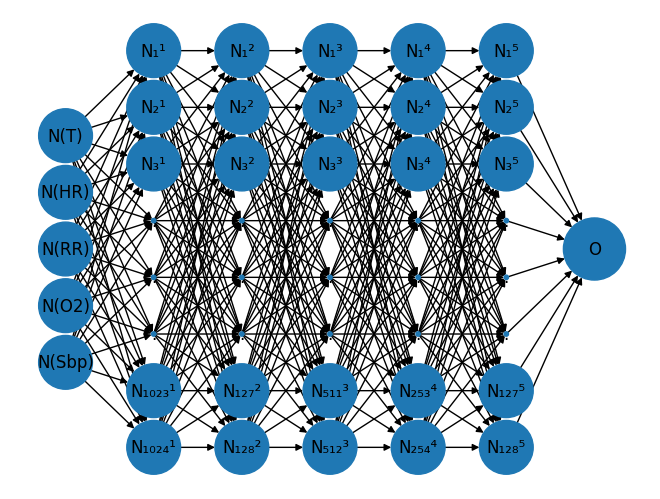

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_net(layers, node_sizes,filename):
    G = nx.DiGraph()

    pos = {}  # Position dictionary
    labels = {}  # Label dictionary

    max_layer_size = max(len(layer) for layer in layers)

    layer_offsets = [sum(len(layer) for layer in layers[:i]) for i in range(len(layers))]

    for i, layer in enumerate(layers):
        total_nodes = len(layer)
        y_offset = (max_layer_size - total_nodes) / 2  # Calculate vertical offset for centering

        for j, node in enumerate(layer):
            node_id = layer_offsets[i] + j
            pos[node_id] = (i, max_layer_size - j - y_offset)  # Adjust position for centering
            labels[node_id] = node

            if i > 0:  # Not the input layer
                for prev_node_id in range(layer_offsets[i - 1], layer_offsets[i - 1] + len(layers[i - 1])):
                    G.add_edge(prev_node_id, node_id)

    # Flatten the node_sizes list for use in nx.draw
    node_size_list = [size for layer_size in node_sizes for size in layer_size]

    nx.draw(G, pos, labels=labels, with_labels=True, arrows=True, node_size=node_size_list)
    plt.savefig(filename,format='PNG')
    plt.show()

# Define the neural network layers
layers = [
    ["N(T)", "N(HR)", "N(RR)", 'N(O2)','N(Sbp)'],  # Input layer
    ["N₁¹", "N₂¹", "N₃¹",'.','.','.', "N₁₀₂₃¹", 'N₁₀₂₄¹'],
     ["N₁²", "N₂²", "N₃²",'.','.','.', "N₁₂₇²", 'N₁₂₈²'],
     ["N₁³", "N₂³", "N₃³",'.','.','.', "N₅₁₁³", 'N₅₁₂³'],
    ["N₁⁴", "N₂⁴", "N₃⁴", '.','.','.',"N₂₅₃⁴", 'N₂₅₄⁴'],
    ["N₁⁵", "N₂⁵", "N₃⁵", '.','.','.',"N₁₂₇⁵", 'N₁₂₈⁵'],
        
    ["O"]  # Output layer
]
node_sizes = [
    [1500, 1500, 1500,1500,1500],  # Sizes for input layer
    [1500, 1500, 1500, 10,10,10,1500,1500],
     [1500, 1500, 1500,10,10,10, 1500,1500],
     [1500, 1500, 1500,10,10,10, 1500,1500],
     [1500, 1500, 1500,10,10,10, 1500,1500],
     [1500, 1500, 1500,10,10,10, 1500,1500],# Sizes for hidden layer
    [2000]  # Sizes for output layer
]
filename='Model_Architecture'
draw_neural_net(layers, node_sizes,filename)